# Project evaluation 3 Avacado Dataset

Avocado is a fruit consumed by people heavily in the United States. Also known as an alligator pear or butter fruit, the versatile avocado is the only fruit that provides a substantial amount of healthy monounsaturated fatty acids (MUFA). Avocados are a naturally nutrient-dense food and contain nearly 20 vitamins and minerals.

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV file. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Problem Statement
We have two problem statement for this project:

    1- Predict the Avocado's Average Price based on
       different features.
    2- Predict the City or Region of Avocado's

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [2]:
df= pd.read_csv('avacado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape #shows no.of data present

(16468, 14)

In [5]:
df.columns  #shows all columns.

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.head()  # Will give you first 5 records

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [7]:
df.tail()  #shows the last n rows of the Data 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see lots of NaN values are present in the dataset which we can drop later in preprocessing.

In [8]:
df.info() #shows Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.6+ MB


In [9]:
df.isnull().sum()  #shows null count for each column, but will not count Zeros(0) as null

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

We can see that 14951 missing values exist in dataset, that we have to work on later.

# Statistical Summary

In [10]:
df.describe() #shows statistical value od data of integer type.

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [ ]:
Observations-:
1. we can see large difference between 75% values and max values means outliers are present in the dataset.
2.standard deviation is high.
3.1515 values count in each columns confirm that we do not have any missing values in our data set.
4.Average maximum proce is 1.68 and minimum price is 0.49
5.Total Volume, Total Bag, 4046, 4770, 4225, Small and Large bags have highest standard deviation
6.Total Number of bag are 1516 and min is 0  
7.Average sales in each regoin is 758 bags.
8.There are total of 50 regions where avacados are sold.

# Data cleaning

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it,so i removed.

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Lets check the data now

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


Removed successfully

In [13]:
df.dropna(inplace=True)

In [14]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [15]:
df.isnull().sum() 

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Here i removed all the NaN values present in dataset to further do the analysis of data.

Date is Object type not the date type. We have to change its type to date type.

In [16]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

check the head to see changes.

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29


As we have date already so i will remove coloumns of day month year individually.

In [18]:
df.drop('year',axis=1,inplace=True)


In [19]:
df.drop('Day',axis=1,inplace=True)

In [20]:
df.drop('Month',axis=1,inplace=True)

In [21]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


so we removed Day MOnth and year columns from the dataset.

In [22]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

# Explaratory Data Analysis

<AxesSubplot:>

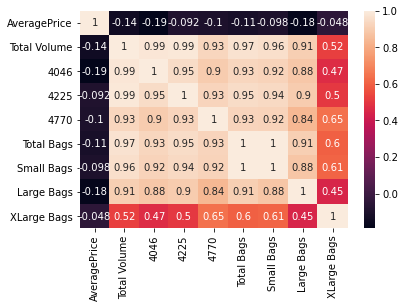

In [23]:
dfcor=df.corr()
sns.heatmap(dfcor,annot=True)

Observations-:
1.AveragePrice&Total Volume have negative corrletions
2.4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region all of them are correlated to each other accept average price.

# Univariate analysis

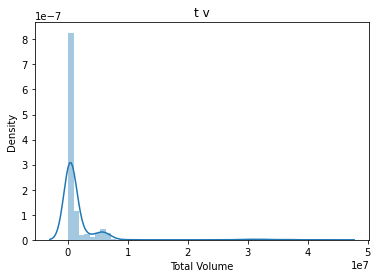

In [24]:
sns.distplot(df["Total Volume"])
plt.title("t v")
plt.show()

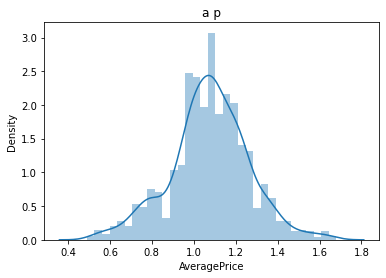

In [25]:
sns.distplot(df["AveragePrice"])
plt.title("a p")
plt.show()

we can see some how normal curve .

# Bivariate analysis

Text(0.5, 1.0, 'Average Price by Date')

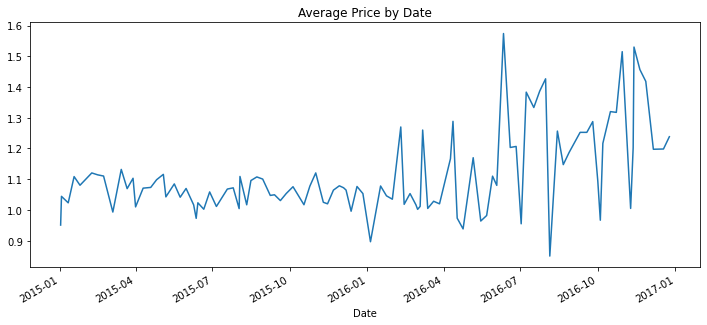

In [27]:
#Let's check the average price with repect to the month

dategroup = df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average Price by Date')

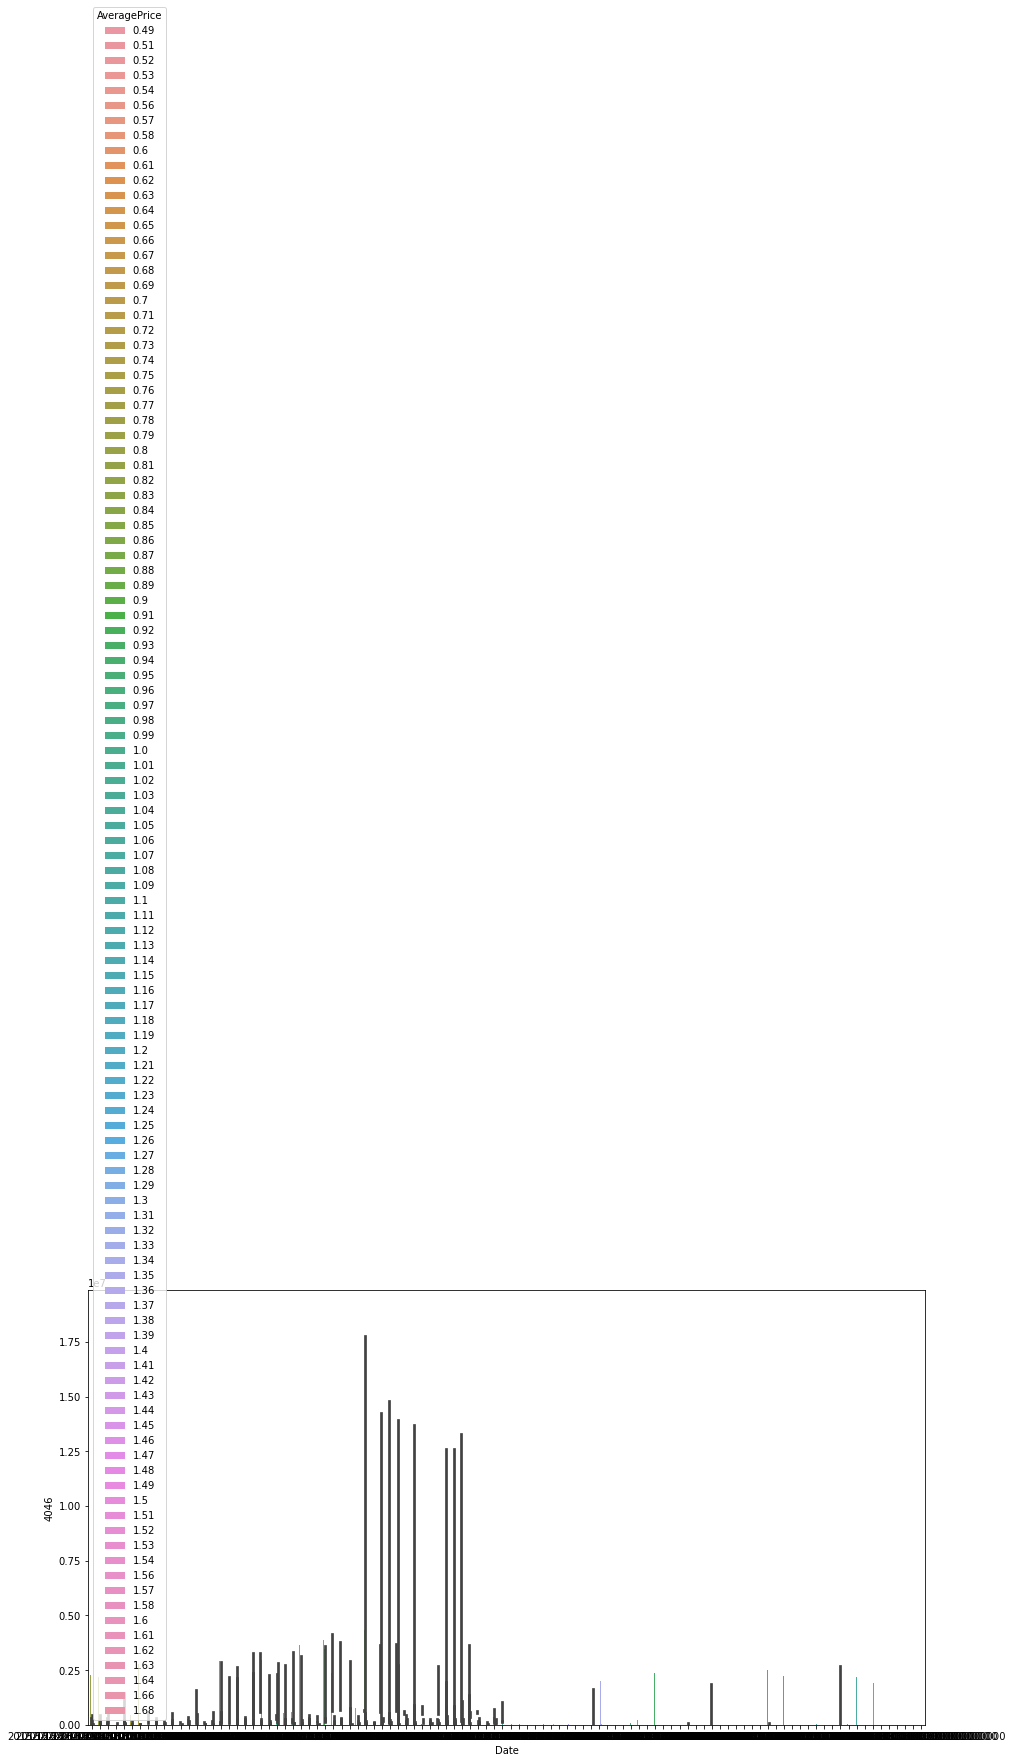

In [28]:
#let's check the average price for 4046 
plt.subplots(figsize = (15,8))
sns.barplot(x = df['Date'], y= df['4046'],hue=df['AveragePrice'])

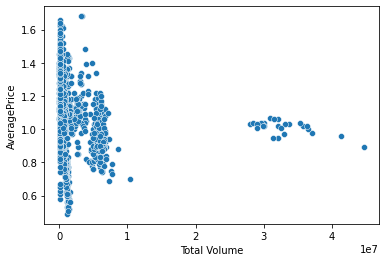

In [30]:
sns.scatterplot(df['Total Volume'],df['AveragePrice']);

increase in volume the average price is decreased

Text(0.5, 1.0, 'Avg Price in each region')

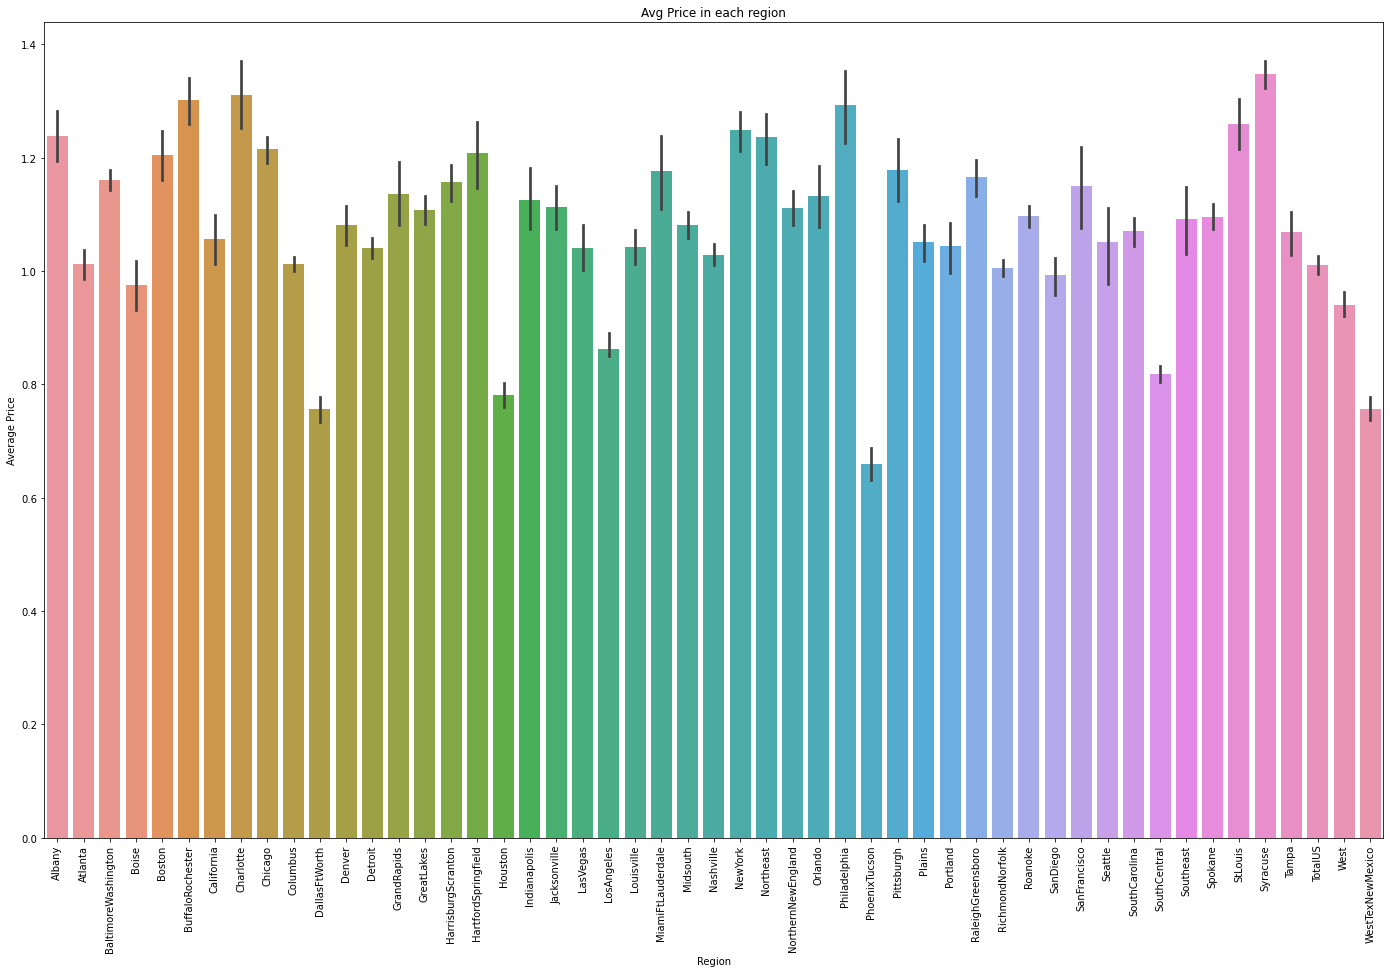

In [31]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Avg Price in each region')


Checking average price of avacados in different regions.We can observe that syracuse has the highest avg price, followed by Philadephia, St. Louis, New Yok and Norht East.

# Multivariate analysis

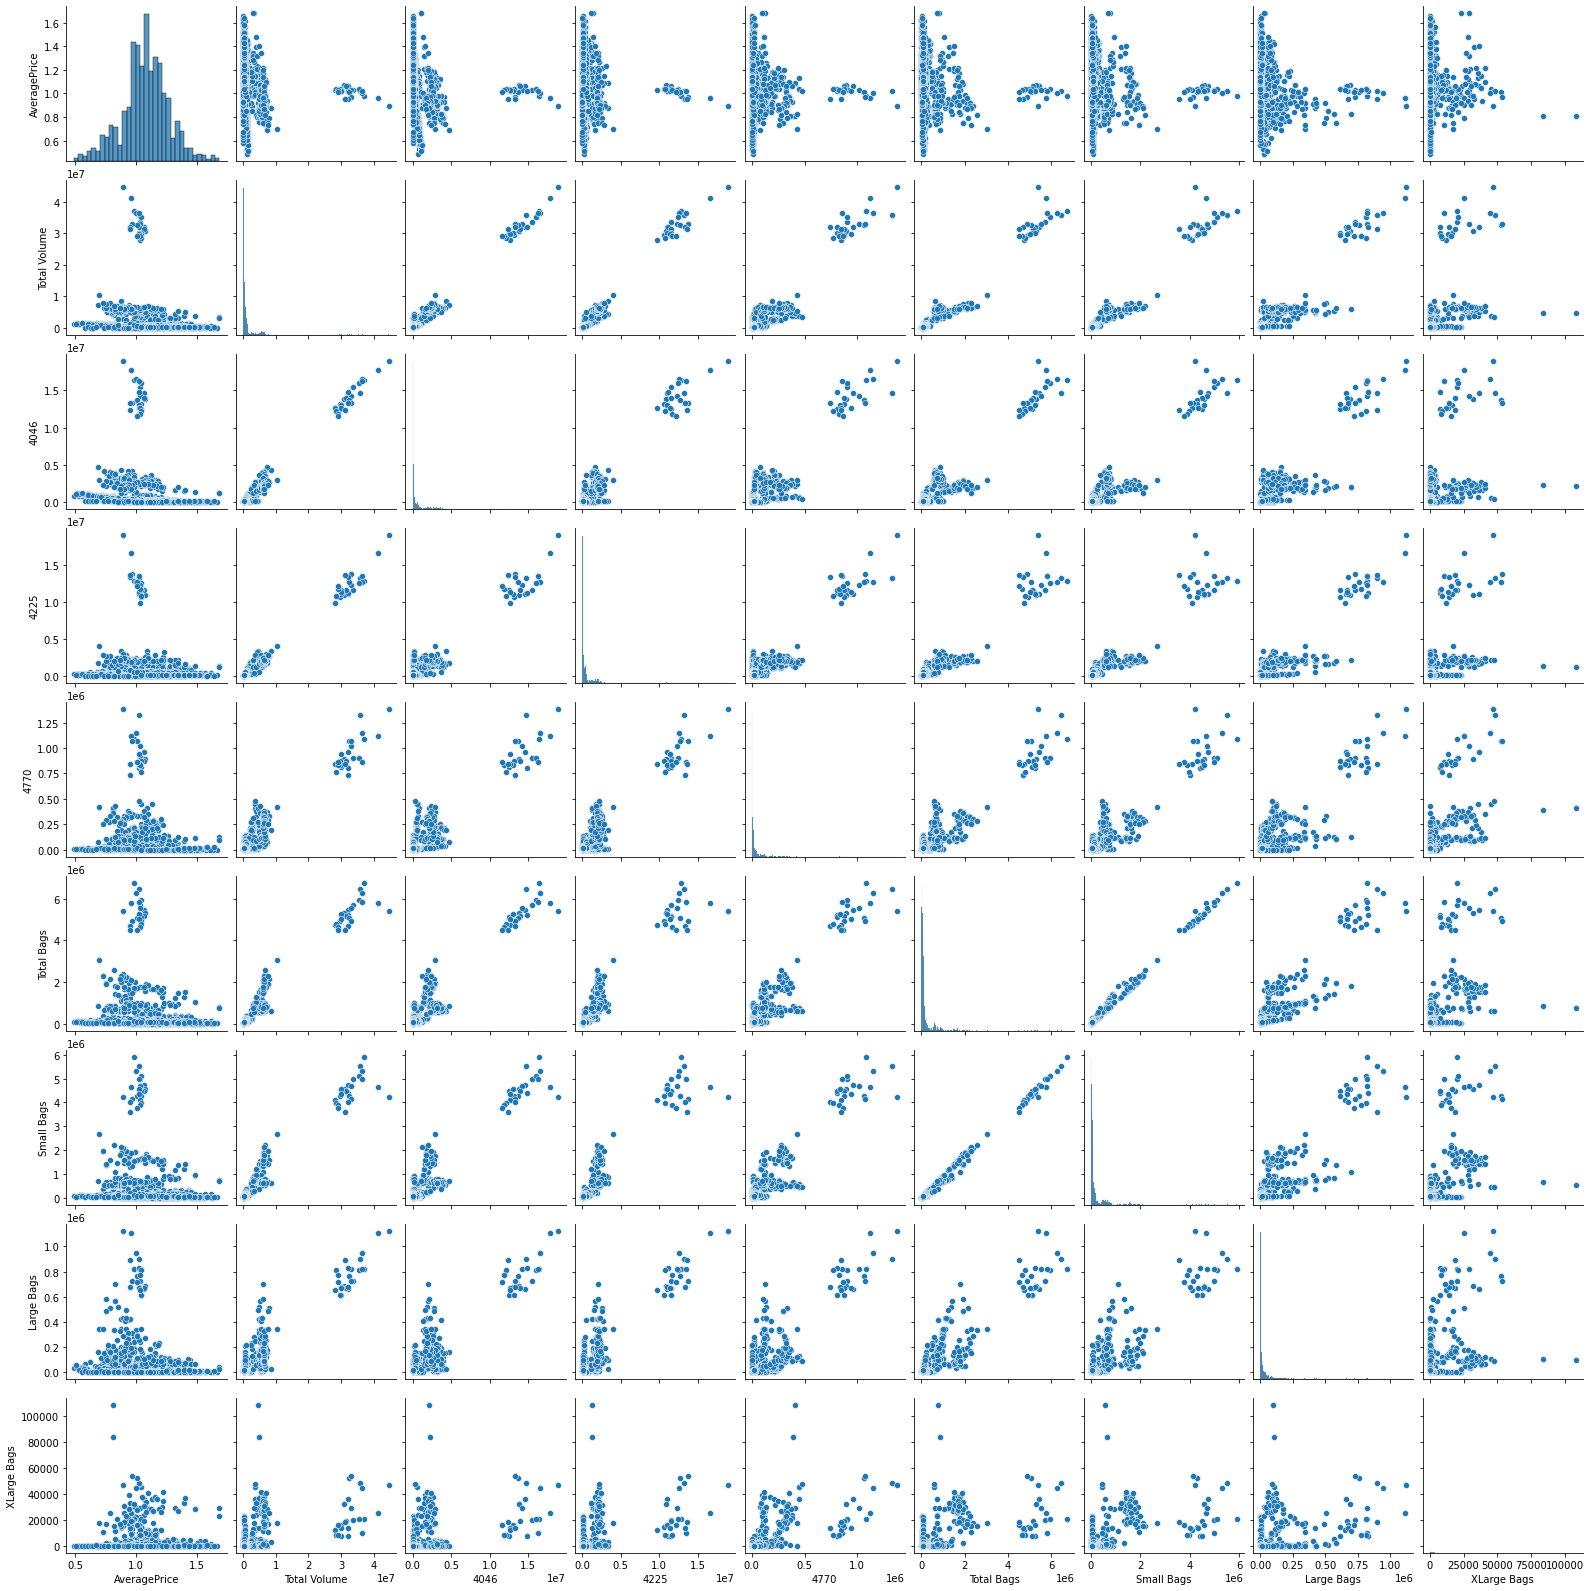

In [32]:
sns.pairplot(df)
plt.show()


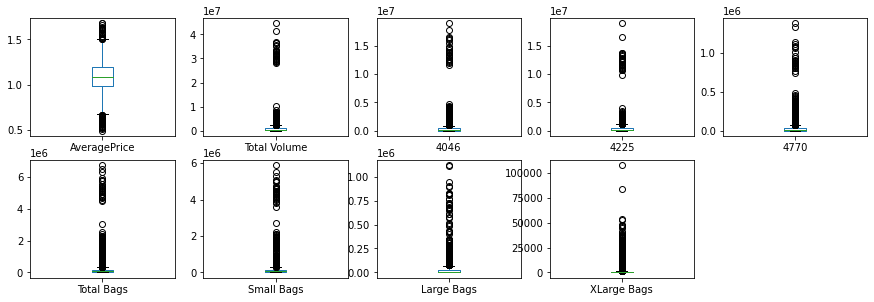

In [33]:
#plotting the boxplot of each column to check the outliers 

df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10));


there are hardly any outliers present in the data set

# Data Prepreation for Model training


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

In [37]:
df.skew()

Date            0.961779
AveragePrice   -0.120069
Total Volume    0.000000
4046            0.000000
4225            0.000000
4770            0.000674
Total Bags      0.000000
Small Bags      0.000000
Large Bags      0.066667
XLarge Bags     1.024596
type            0.000000
region          0.288146
dtype: float64

data have skewness.

In [40]:
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [41]:
df.skew()

Date           -1.057323
AveragePrice   -0.120069
Total Volume    0.000000
4046            0.000000
4225            0.000000
4770            0.000674
Total Bags      0.000000
Small Bags      0.000000
Large Bags      0.066667
XLarge Bags     0.233986
type            0.000000
region          0.288146
dtype: float64

skewness is treated.

In [43]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [44]:
x.shape

(1517, 11)

In [45]:
y.shape

(1517,)

In [56]:
y.dtypes

dtype('int32')

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc=pd.DataFrame(x_sc,columns=x.columns)

scaled the data

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [50]:
lr = LinearRegression()
rd = Ridge()
lsr = Lasso()
knr = KNeighborsRegressor()
sv= SVR()
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
abc = AdaBoostRegressor()
gbr = GradientBoostingRegressor()


In [61]:
lr.fit(x_train,y_train)


LinearRegression()

In [64]:
lr.intercept_


68.47260135624055

In [65]:
lr.coef_

array([ 0.03085856, -0.02945097, -0.01536595,  0.00728027, -0.00357541,
       -0.01920137,  0.03924223,  0.0087072 , -0.07910052,  0.        ,
       -0.11148792])

In [66]:
lr.score(x_train,y_train)

0.3623133245799358

In [67]:
#predict the value
pred=lr.predict(x_test)
print('predeicted result price:',pred)
print('actual price:',y_test)

predeicted result price: [66.48746104 71.96506981 47.4485483  48.1287615  70.21410645 49.91576541
 50.19882299 55.07091484 52.73848437 48.72893442 48.461676   58.03846419
 71.42516407 37.29437878 50.06628148 70.51082788 65.490797   45.8349857
 49.91229113 73.16387847 49.90680851 59.95400249 55.01794443 70.80113976
 71.40477703 34.44858514 55.98011024 42.70925797 57.85730142 44.98794148
 63.31740929 42.92620264 73.79025037 54.47232075 44.82501348 83.24328132
 73.67448098 37.54313965 48.48280826 47.84275474 47.42556175 65.72360208
 77.14501298 56.8193521  46.95054815 61.11210354 59.47887915 42.22188622
 62.58576131 61.17463845 66.89985229 50.45241086 63.05032566 70.5721106
 49.70353743 63.95625932 61.29021533 50.12014906 51.3249397  55.90386525
 60.27870539 60.02045212 69.25405578 66.10460094 51.29291911 43.32115955
 28.81080584 61.5090656  44.58902017 45.56594457 64.13129424 42.63968283
 53.61513111 48.23285752 49.27544243 45.4900251  60.1284553  60.02934911
 54.83558846 41.38923725 59.

In [68]:
print('error:')
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean_absolute_error: 11.484352910472136
mean squared error: 223.38802467086288
Root mean square error: 14.94617090330707


In [69]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.3564602923389911


In [71]:
from sklearn.linear_model import Lasso,Ridge

In [72]:
lsr=Lasso(alpha=0.0001)
lsr.fit(x_train,y_train)
lsr.score(x_train,y_train)

0.36231332453754017

In [74]:
lsr.coef_

array([ 0.03073186, -0.02945099, -0.01536598,  0.00728025, -0.00357546,
       -0.01920125,  0.03924218,  0.00870715, -0.079077  ,  0.        ,
       -0.1114884 ])

In [75]:
rd=Ridge(0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)



0.3623133245799357

In [76]:
rd.coef_

array([ 0.03085855, -0.02945097, -0.01536595,  0.00728027, -0.00357541,
       -0.01920137,  0.03924223,  0.0087072 , -0.07910052,  0.        ,
       -0.11148792])

In [77]:
kernellist=['rbf','linear','poly']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.400605451623001
0.3435508655508529
0.38753654705906826


In [81]:
predsvc=sv.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predsvc))
print('Mean squared Error= ', mean_squared_error(y_test,predsvc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predsvc)))

Mean Absolute Error=  11.300771441392321
Mean squared Error=  212.34233241629457
Root Mean Absolute Error=  3.3616620058227626


In [83]:
#criterion =gini and entropy
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,preddtc))
print('Mean squared Error= ', mean_squared_error(y_test,preddtc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,preddtc)))

Mean Absolute Error=  7.151315789473684
Mean squared Error=  97.26315789473684
Root Mean Absolute Error=  2.6741944187874007


In [92]:
abc.fit(x_train,y_train)
abc.score(x_train,y_train)
predabc=abc.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predabc))
print('Mean squared Error= ', mean_squared_error(y_test,predabc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predabc)))

Mean Absolute Error=  9.145271680918611
Mean squared Error=  129.3114904746093
Root Mean Absolute Error=  3.024115024419311


In [93]:
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,preddtc))
print('Mean squared Error= ', mean_squared_error(y_test,preddtc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,preddtc)))

Mean Absolute Error=  7.115131578947368
Mean squared Error=  94.97697368421052
Root Mean Absolute Error=  2.667420397865205


In [94]:
#k=10
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predknr))
print('Mean squared Error= ', mean_squared_error(y_test,predknr))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predknr)))
print('R2 Score=',r2_score(y_test,predknr))

Mean Absolute Error=  6.3125
Mean squared Error=  78.4746052631579
Root Mean Absolute Error=  2.5124689052802225
R2 Score= 0.7739291324847246


In [86]:
rfc = RandomForestRegressor(min_samples_leaf = 1, min_samples_split= 2,
                            max_features = 'sqrt', n_estimators = 50)
rfc.fit(x_train,y_train)
print("Score=",rfc.score(x_train,y_train))
predrfc = rfc.predict(x_test)
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('R2 Score=',r2_score(y_test,predrfc))


Score= 0.9712851350763224
Mean Absolute Error=  5.641184210526316
Mean squared Error=  55.69111578947368
Root Mean Absolute Error=  2.3751177256141043
R2 Score= 0.8395641645192097


# Hypertuning the model

In [88]:
from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }
grid = GridSearchCV(estimator=rfc,param_grid=parameters,
                    cv = 3, verbose=2, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1124 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1830 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2357 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  6.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             n_estimators=50),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]},
             verbose=2)
0.793929326695523
30
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


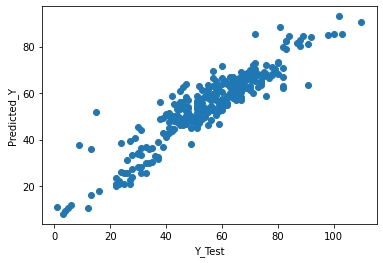

In [89]:
plt.scatter(x=y_test,y=predrfc)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y');


Random Forest Regressor has the highest R2 score ie around 83%
For Regression problem we got the best result from Random Forest with and accuracy of 97%¶

# Classification Model

Now we will take region as indepependent variable and predicting using classificaton method

In [96]:
x_c = df.drop(columns=['region','Date','Total Bags'])
y_c = df[["region"]]
print(x_c.shape)
print(y_c.shape)

(1517, 9)
(1517, 1)


In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [98]:
#scaled the data

In [99]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=0.3,random_state=0)

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(yc_test, yc_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(yc_test, yc_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(yc_test, yc_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(yc_test,yc_predict)*100:0.2f}%")

In [101]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {log.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 89.73%
Accuracy of Test Dataset: 84.87%


In [102]:
y_predict=log.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49 32  0 27 27  9 32 47 26 47  3  6 33  4  9 42 46 19  0  1 20  7 18 30
 47  9 31 34 11 43  1 17 28 39  6 47 42 46 42 22 26 34  6 23 19 32  6  6
  4 39 27 37 44 12  2 13 50 47 23  9  3  2 13 45 19 16  0 44  7 47 25 44
 46 35 14 28 35 12  6  5  0 48 35  5 39 35 41  5 38 42 32  0  6  9 22 18
  1  3 44  3 50  0  1  5  3 44  7  2 31  1 26 17 34 30 38  1 23 24  4 44
 12  3 32  0  5  5 38  3 22 16 31  9 26  3  5  9  2 32 43  0 26 47 19  1
  1  6  4 16 49 12 39 31  4 28 39 19 14  5  5 31 42 11  6 25 22 48 31  8
 38  5 27 36  0 17 47  0 31  9 38 13 41 26 39 45 11 49 19 47 38  1 47  2
 32  0 31 42 27  3 14 16  3 41 27 47  6 42 42 45 24  0 31  1 39  2 31  3
 46 20  9  7 19 38  4  7  5  1 28  0  4  0 48  2 12  5  2 23 15 41 34  6
  0  4 44  1 50 34 12 37  8  0  4 49 26  7 28 31 16 26  8 44  7  1 14  0
  6 15 39  8 18  7 31  4 43 49 25  6 45 29 42 35  7 17 31 17 31 31 31 31
  2 40 25 38  6 11  4  4 12  6  4 36  4  1 48  3 50 12 26 29  0 26 26  7
 18 14  6  0 41 41 36  3 26 44  0

In [105]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(xc_train, yc_train)
print(f"Accuracy of Train Dataset: {tree.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 23.09%
Accuracy of Test Dataset: 19.30%


In [106]:
y_predict=tree.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49  0  0  2  2  2  0  2  2  2  3  6  2  0  2 42  0  2  0  2  2  2  0  2
  2  2  2  6  2  2  2  2  0  2  2  2 49  0 49  0  2  2  6  2  2  0 48  2
  2  2  2  2  2  2  2  0  2  3  2  2  2  2  0  2  2  0  0  2  2  2  3  2
  0  2  2  0  2  2  6  0  0 48  2  0  2  2  2  0  2 49  0  0  6  2  0  0
  2  3  2  3  2  0  2  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  0  2
  2  2  0  0  0  0  2  3  0  0  2  2  2  2  0  2  2  0  2  0  2  2  2  2
  2  6  2  0  6  2  2  2  0  0  2  2  2  0  0  2 42  2  6  2  0 48  2  2
  2  0 49  2  0  2  2  0  2  2  2  0  2  2  2  2  2 49  2  2  2  2  2  2
  0  0  2  2  2  3  2  0  2  2  2  2  6 42 42  2  2  0  2  2  2  2  2  2
  0  2  2  2  2  2  0  2  0  2  0  0  0  0 48  2  2  0  2  2  2  2  2  6
  0  0  2  2  2  2  2  2  2  0  0  2  2  2  0  2  0  2  2  2  2  2  2  0
  2  2  2  2  0  2  2  0  2 49  2 48  3  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  6  2  0  0  2  6  0  2  0  2 42  3  2  2  2  2  0  2  2  2
  0  2  6  0  2  2  2  3  2  2  0

In [107]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 77.95%
Accuracy of Test Dataset: 71.71%


In [108]:
y_predict=svm_rbf.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[ 6 22  0 26 26  9 22 47 26 47  3  6 33 28  9 42  5 19  0  1 36  7 22 30
  1  9 31  6 11 42  1 17 28 34  6  1  6  0 42 22 26 34  6 47 19 22  6  6
  4 31 26 37 44 12  2 13 42 37 47  9  3  2 13 45 19 28  0 44  7 47  9 44
  0 12 38 28 12 12  6  5  0  6  7  5  2  7 41  0 38  6 22  0  6  9 22 22
  1  3 44  3 50  0  1  5  3 44  7  2 31  1 26 17 34 30 38  1  1  6  4 44
 12  3 22  0  5  5 38  3 22 28 17  3 26  3  5  9  2 22 42  0 26 47 19  1
  1  6  2 28  6 12 34 31  4 28 31 19  6  5  5 31 42 11  6 25 22  6 31  2
 38  5 27 36  0 17 47  0 31 44 38 13 41 26 34 37 11  6 19  1 38  1 47  2
 22  0 31 36 26  3  6 28  3 41 26 47  6 42 42 45  6  0 31  1 34  2 17  3
  0 36  3  7 19 38  4  7  5  1  4  0  4  0  6  2 12  5  2  1 15 41 34  6
  0  4 44  1 50 34 12 37  8 22  4 11 26  7 28 31 28 26  2 36  7  1  6  0
  6 15 15  8 18  7 31  4 42  6 25  6  3 29 31 12  7 17 31 17 31 17 31 31
  2 34 25 38  6 11  4  4 12  6  4 36  4  1  6  3 50 12 26 29  0 26 26  7
 18  6  6  0 41 41 36  3 26 44  0

In [109]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {forest.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 93.86%


In [110]:
y_predict=forest.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 32  0 27 27  9 22 47 26 47  3  6 33 28  9 42  5 19  0  1 20  7 18 30
 47  9 10  6 11 43  1 17 28 39  6 47  6 46 42 22 26 34  6 29 19 32 48 14
  2 31 27 37 44 12  2 13 43  3 23  9  3  2 13 45 19 16  0 44  7 47  3 44
 46 35 38 28 35 12  6  5  0 48  7  0 39 35 41 46 38 49 32  0  6  9 22 18
  1  3 44  3 50  0  1  5  3 44  7  2 10 23 26 17 34 30 38  1 23 24  4 44
 12  3 22  0  5  5 31  3 22 16 17 44 26  3  5  9  2 22 43  0 26 23 19  1
  1  6  4 16  6 12 39 31  4 28 39 19 14  5  5 31 42 11  6 25 22 48 10  8
 34  5 27 36  0 17 47  0 31 44 38 13 41 26 39 45 11 49 19 47 38 23 47  2
 32  0 10 20 27  3 14 16  3 41 27 47  6 42 42 45 24  0 10  1 39  2 31  3
 46 20 44  7 19 38  4  3  5  1 28  0  4  0 48  2 12  5  2 23 15 41 34  6
  0 28 44 23 50 34 12 37  8 32  4 11 26  7 28 10 16 26  8 36  7 29 14  0
  6 15 15  8 18  7 31  4 43 49 25 48  3 29 50 35  7 17 31 17 31 31 10 31
  2 40 25 38  6 11  4  4 12  6  4 36  4 47 42  3 50 12 26 29  0 26 26  7
 18 14  6  0 41 41 38  3 26 44  

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gbc.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 86.40%


In [112]:
y_predict=gbc.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 18  0 27 27  9 22 29 26 47  3  6 39 28  9 42  5 19  0  1 36  7 18 30
 47  9 10  6 11 33  1 17 28 39  6 47  6 46 43 22 26 34  6 29 19 32 48  7
  2 31 27 37 44 12  2 13 33  3 47  9  3  2 13 45 19 38  0 44  7 47 25 44
 46 35 38 28 35 12  6  5  0 48  7  0 39 35 41 46 38 49 32  0  6  9 13 18
  1  3 44  3 38  0  1  5  3 44  7  2 10  1  2 17 34 30 38  1 23 24  4 44
 12  3 22  0  5  5 31  3  0 16 17 44 26  3  5  9  2  0 33  0 26 23 19  1
  1  6 34 38  6 12 11 31  4 28 39 19 14  5  5 10 42 38  6 25 22 48 10  8
 34  5 27 36  0 17 47  0 31 44 38 13 41 26 11 45 11 49 19  1 38  1 47  2
 32  0 10 38 27  3 14 38 44 41 27 23  6 42 34 45 24  0 10  1 39  2 31  3
 46 38 44  7 19 38  4  3  5  1 28  0  4  0 48  2 12  5  2 47 15 41 34  6
  0 28 44  1 50 34 12 37  8  0  4 11 26  7 28 10 16 26  8 37  7  1 14  0
  7 15 15  8 18  7 31  4 33 49 25 48  3 47 31 35  7 17 31 17 31 31 10 31
  2 40 38 38  6 11  4 40 12  6  4 36  4 47 42  3 31 12 26 47  0 26 26  7
 18 14  6  0 41 41 38  3 26 44  

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {knn.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(xc_test,yc_test)*100:0.2f}%")


Accuracy of Train Dataset: 96.70%
Accuracy of Test Dataset: 93.64%


In [114]:
y_predict=knn.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 22  0 27 27  9 32 29 26 47  3  6 33 28  9 42  5 19  0  1 20  7 18 30
 47  9 10  6 11 43  1 17 28 39  6 47  6 46 43 22 26 34  6 29 19 32 48  6
  4 31 27 37 44 12  2 13 43  3 23  9  3  2 13 45 19 16  0 44  7 47 25 44
 46 35 38 28 12 12  6  5  0 48  7  5 39 35 41 46 38 49 32  0  6  9 22 18
  1  3 44  3 50  0  1  5  3 44  7  2 10 23 26 17 34 30 38  1 23 14  4 44
 12  3 22  0  5  5 38  3 22 16 17  9 26  3  5  9  2 22 43  0 26 23 19  1
  1  6  2 16  6 12 39 31  4 28 39 19 14  5  5 10 42 11  6 25 22 48 10  8
 38  5 27 36  0 17 47  0 31 44 38 13 41 26 39 45 11 49 19 47 38  1 47  2
 32  0 10 20 27  3 14 16  3 41 27 23  6 42 49 45 24  0 10  1 39  2 31  3
 46 20 44  7 19 38  4  7  5  1  4  0  4  0 48  2 12  5  2 47 15 41 34  6
  0  4 44 29 50 34 12 37  8 32  4 11 26  7 28 10 16 26  8 36  7  1 14  0
  6 15 15  8 18  7 31  4 43 49 25 48  3 29 50 35  7 10 31 17 10 31 10 31
  2 40 25 38  6 11  4  4 12  6  4 36  4  1 42  3 50 12 26 29  0 26 26  7
 18 14  6  0 41 41 36  3 26 44  

In [115]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gnb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 95.85%
Accuracy of Test Dataset: 89.04%


In [116]:
y_predict=gnb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 32  0 27 27  9 22 29 26 47  3  6 33 28  9 42  5 29  0  1 20  7 18 30
 47  9 10  6 11 43  1 17 28 39  6 47  6 46 31 22 26 34  6 29 19 32 48  6
  4 31 27 37  3 12  2 13 31  3 23  9  3  2 13 45 19 16  0 44  7 47  9 44
 46 35 38 28 35 12  6  5  0 48 35  0 39 35 41 46 38 49 32  0  6  9 22 18
  1  3 44  3 50  0  1  5  3 44 35  2 10 23 26 17 34 30 38  1 23 24  4 44
 12  3 22  0  5  5 31  3 22 16 17 19 26  3  5  9  2 22 43  0 26 23 19  1
  1  6  4 16  6 12 39 31  4 16 39 19 14  5  5 31 42 11  6 25 22 48 10  8
 34  5 27 36  0 31 29  0 31 44 38 13 41 26 39 45 11 49 19  1 38  1 47  2
 32  0 10 36 27  3 14 16  3 41 27 23  6 42 42 45 24  0 10  1 39  2 10  3
 46 20  0 35 19 38  4  3  0  1 28  0  4  0 48  2 12  5  2  1 15 41 34  6
  0 28 44  1 50 34 12 37  8 32  4 11 26  7 28 10 16 26  8 36 35 29 14  0
  6 15 15  8 18 35 31  4 43 49 25 48  3 29 31 35  7 17 31 17 31 31 10 31
  2 34 25 38  6 11  4  4 12  6  4 36  4 47 42  3 50 12 26 29  0 26 26 35
 18 14  6  0 41 41 36  3 26 44  

In [117]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {adb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(xc_test,yc_test)*100:0.2f}%")
y_predict=adb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Accuracy of Train Dataset: 16.68%
Accuracy of Test Dataset: 13.38%
Predicted values:

[49  4  4  2  2  2  4  2  2  2  2  6  2  4  2  6  4  2  4  2  2  2  4  2
  2  2  2  6  2 21  2  2  4  2 21  2  6  4 49  4  2  2  6  2  2  4 48  2
  2  2  2  2  2  2  2  4 21  2  2  2  2  2  4  2  2  4  4  2  2  2  2  2
  4  2  2  4  2  2  6  4  4 48  2  4  2  2  2  4  2  6  4  4  6  2  4  4
  2  2  2  2  2  4  2  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  2
  2  2  4  4  4  4  2  2  4  4  2  2  2  2  4  2  2  4 21  4  2  2  2  2
  2  6  2  4 49  2  2  2  4  4  2  2  2  4  4  2  6  2  6  2  4 48  2  2
  2  4 27  2  4  2  2  4  2  2  2  4  2  2  2  2  2 49  2  2  2  2  2  2
  4  4  2  2  2  2  2  4  2  2  2  2 49  6  6  2  2  4  2  2  2  2  2  2
  4  2  2  2  2  2  4  2  4  2  4  4  4  4 48  2  2  4  2  2  2  2  2  6
  4  4  2  2  2  2  2  2  2  4  4  2  2  2  4  2  4  2  2  2  2  2  2  4
 21  2  2  2  4  2  2  4 21 49  2 48  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  6  2  4  4  2  6  4  2  

In [119]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log), ('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results=model_selection.cross_val_score(model[1],xc_train,yc_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 83.60%
Cross validated Accuracy of Support Vector Machine (rbf): 72.29%
Cross validated Accuracy of Decision Tree: 22.71%
Cross validated Accuracy of Random Forest: 96.61%
Cross validated Accuracy of GradientBoostingClassifier: 87.46%
Cross validated Accuracy of KNeighborsClassifier: 92.93%
Cross validated Accuracy of GaussianNB: 92.17%
Cross validated Accuracy of AdaBoostClassifier: 13.86%


In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree,
    'Support Vector Machine (rbf)': svm_rbf,
    'Random Forest':forest,
    'GradientBoostingClassifier':gbc,
    'GaussianNB':gnb,
    'AdaBoostClassifier':adb    
    
}

regression_models = {
    'LogisticRegression': log
}

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}: {}'.format(name, accuracy_score(yc_test, y_pred)*100))

KNeighboursClassfier: 91.8859649122807
DecisionTreeClassifier: 19.298245614035086
Support Vector Machine (rbf): 88.37719298245614
Random Forest: 94.51754385964912
GradientBoostingClassifier: 86.8421052631579
GaussianNB: 88.37719298245614
AdaBoostClassifier: 13.596491228070176


In [122]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}\t{}'.format(name, accuracy_score(yc_test, y_pred)))

LogisticRegression	0.8464912280701754


Random Forest is the best model with around 94% accuracy 

# Saving the models result

In [123]:
import joblib

#save the model as a pickle in a file
joblib.dump(model,'avacado.pkl')

['avacado.pkl']